In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas

In [26]:
name = 'data_cleaned/split_data/semesters/fall.csv'

data = pandas.read_csv(f'{name}')
df = data.groupby(['Date', 'Tags']).count().reset_index()[['Date', 'Tags']]

'''days = []
for i in range(len(df) - 1):
    if df['Tags'][i] == 'training' and df['Tags'][i+1] == 'game':
        days.append(df['Date'][i])
        days.append(df['Date'][i+1])'''

data.fillna(0, inplace=True)
#data = data[data['Semester'] == 1].reset_index(drop=True)
#data = data[data['Date'].isin(days)]
data_numerical = data.loc[:, [ 'Session Title', 'Player Name', 'Split Name', 'Tags', 'Duration', 'Distance (miles)', 'Power Plays', 'Energy (kcal)', 'Player Load', 'Top Speed (m/s)', 'Distance Per Min (m/min)', 'Power Score (w/kg)']]
data_numerical = data_numerical.select_dtypes(include=['float64', 'int64'])

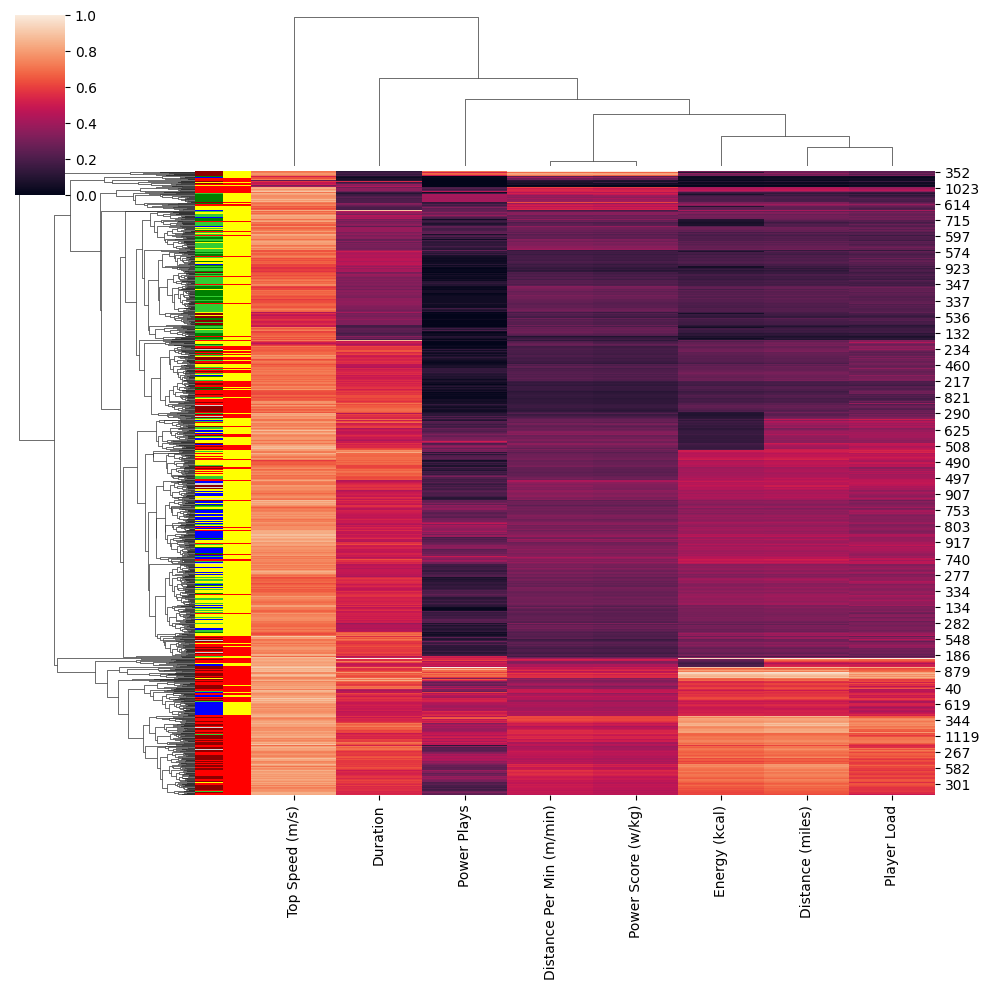

In [27]:
weekday_colors=data['WeekDay'].map({
    1: 'lightgrey',
    2: 'blue',
    3: 'yellow',
    4: 'limegreen',
    5: 'red',
    6: 'green',
    7: 'darkred'
})

tag_colors=data['Tags'].map({
    'game': 'red',
    'training': 'yellow'
})


map = sns.clustermap(data_numerical, row_colors=[weekday_colors, tag_colors], standard_scale=1)